# Quantum Circuit Simulator Basics
---

### Instalation.

In [ ]:
#instaling the library \
!git clone https://github.com/katolikyan/QCSimulator.git
!pip3 install QCSimulator/

### The beginning: Circuit initialization.
To start we have to import `qcsimulator` library. \
The only function we will use there is `qcs.circuit_init()` which accepts the number of desired qubits. \
*(Calculations cost grows very quick so I would recomend to keep the number of qubits between 1 and 20)*.

In [ ]:
import qcsimulator as qcs

# creating the circuit with 2 qubits on the register:
circuit = qcs.circuit_init(2)

### Appling gates: 
To apply a gate to the circuit we are going to call a method form a circuit. \
Methods are accepting qubits index on which we want to apply a gate. \
Like in a python List index can be negative as well. \
\
If it is a control-like gate the method accepts 2 qubits. The first index is used for a control connection and the second is for operation.

Gates available on this build: \
* `i`  — (I) identity gate. \
* `x` — Pauli-X (NOT) gate. \
* `y` — Pauli-Y gate \
* `z` — Pauli-Z gate \
* `h` — H (Hadamard) gate \
* `t` — T gate \
* `ci` — control-identity. *(just a connection of 2 qubits)*
* `cx` — CNOT gate \
* `cz` — CZ gate \
* `cy` — CY gate \
* `ch` — CH gate \
* `rx` — rotation through angle $\theta$ (radians) around the x-axis \
* `ry` — rotation through angle $\theta$ (radians) around the y-axis \
* `rz` — rotation through angle $\theta$ (radians) around the z-axis \
* `rot` — Phase rotaion through angle $\theta$ (radians) gate 
* `swap` — SWAP gate swaps the state of the two qubits 
* `crot` — controlled phase shift with angle $\theta$ (radians) 


In [ ]:
# Applying NOT gate to qubit 0. circuit.x(-2) would be the same in this case.
circuit.h(0)

# Applying NOT gate to qubit 1. circuit.x(-1) would be the same in this case.
circuit.x(1)

# Applying CNOT gate to qubit 0 and qubit 1. 
# circuit.x(-2, -1) would be the same in this case.
circuit.cx(0, 1)

# Resulting cirquit would look like this:
#  {q0}-H--*---
#          | 
#  {q1}-X--X---

### Execution. Results. 
Now, when we have built a circuit, we need to execute it. \
To do that we are going to call the `circuit.execute()` method which will return us an Ececution_result class object. \
\
This object contains our wave function state and some methods to get the state vector, probabilities, or random bitstring probability. \
Thus we have next methods: \

```python
get_state_vector()
```
* returns state vector as `np.ndarray`

```python
get_state_tensor()
```
* returns state tensor as `np.ndarray`

```python
get_all_probabilities()
```
* returns table of probabilities as `dict`

```python
get_bitstr_probability(bitstring: str = None)
```
* returns probabilitie for a given bitstring or for rundom one if nothing was provided

```python
get_single_qubit_probability(n_qubit: int)
``` 
* returns probabilitie for a specific qubit as a `dict` with probs to get `0` and `1`

```python
get_n_qubit_probability(start: int, stop: int)
```
* returns probabilitie for a slise of qbits as a `dict`


```python
measure_all(shots: int = 32)
```
* simulates measurments and returns results for evety shot in a `list`

\

Let's apply those methods and get some results. For that we at first have to execute the circuit.

In [ ]:
result = circuit.execute() # circuit execution

# getting the state vector.
statevector = result.get_state_vector()
print("StateVector: \n", statevector, "\n")

# We can also get the state tensor.
statetensor = result.get_state_tensor()
print("StateTensor: \n", statetensor, "\n")

# getting all the probabilities
probs = result.get_all_probabilities()
print("Probabilities: \n", probs, "\n")

# getting the probabilitie for "01" where 1 is the 1st qubit and 0 is the 2nd
bitstr_prob = result.get_bitstr_probability("01")
print("Prob for '01': \n", bitstr_prob, "\n")

# getting the prob for a single qubit
single_prob = result.get_single_qubit_probability(0)
print("Prob single qubit 0: \n", single_prob, "\n")

StateVector: 
 [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j] 

StateTensor: 
 [[0.        +0.j 0.70710678+0.j]
 [0.70710678+0.j 0.        +0.j]] 

Probabilities: 
 {'00': 0.0, '01': 0.4999999999999999, '10': 0.4999999999999999, '11': 0.0} 

Prob for '01': 
 {'01': 0.4999999999999999} 

Prob single qubit 0: 
 {'0': 0.4999999999999999, '1': 0.4999999999999999} 



Here we are trying to simulate the process and print the distribution we get

results : 
 ['01', '10', '01', '01', '01', '01', '10', '01'] 



(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

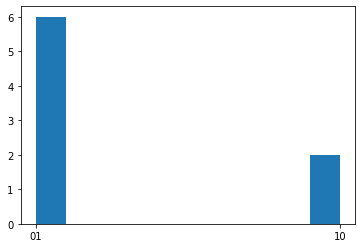

In [ ]:
import matplotlib.pyplot as plt

# getting distribution for 64 shots
sim_res = result.measure_all(shots=8)
print("results : \n", sim_res, "\n")
plt.hist(sim_res)

---
# Circuit Examples. 
In this section, we are going to create some simple circuits as an example of code.

### Circuit #1
![Circuit_1](https://drive.google.com/uc?id=1c2TvHXGvq31aWxWj-CTo7fw6NJcgWIJa)

In [ ]:
circuit = qcs.circuit_init(2) # Circuit initialization
circuit.h(0)                  # Hadamart on qubit 0
circuit.cx(0, 1)              # CNOT on qubit 0 and 1
result = circuit.execute()    # execution of the circuit

# Getting the statevector:
state_vector = result.get_state_vector()
# Getting the random probability in little endian:
randbitstr = result.get_bitstr_probability()

print("StateVector:\n", state_vector, "\n")
print("Random Probability:\n", randbitstr)

StateVector:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] 

Random Probability:
 {'10': 0.0}


### Circuit #2
![Circuit_2](https://drive.google.com/uc?id=1YQprI_QpCSZI2c_bmS5_0-1Lu78Q4-tW)

In [ ]:
circuit = qcs.circuit_init(2)
circuit.x(1)
circuit.cx(0, 1)
circuit.cx(1, 0)
circuit.cx(0, 1)
result = circuit.execute()

state_vector = result.get_state_vector()
# Get all the probabilities in little-endian:
all_probs = result.get_all_probabilities()

print("StateVector:\n", state_vector, "\n")
print("All the robabilities:\n", all_probs)

StateVector:
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j] 

All the robabilities:
 {'00': 0.0, '01': 1.0, '10': 0.0, '11': 0.0}


### Circuit #3
This circuit will prove that all gates are unitary and state can be reversed.
![circuit_3](https://drive.google.com/uc?id=1i-PwTSHjzr4Fvl5cFPXLKa8gRUIqsCer)


In [ ]:
circuit = qcs.circuit_init(3)

# Applying all the gates. Please notice that the order matters:
circuit.y(0)
circuit.h(1)
circuit.x(2)
circuit.cx(0, 1)
circuit.h(0)
circuit.cz(1, 2)
circuit.cy(0, 2)
circuit.cy(0, 2)
circuit.cz(1, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.x(2)
circuit.h(1)
circuit.y(0)

# Getting the result:
result = circuit.execute()

# Let's get all the possible data:
# state_vector, state_tensor.
# all probs, random prob and particular probs.
state_vector = result.get_state_vector()
state_tensor = result.get_state_tensor()
all_probs = result.get_all_probabilities()
rand_prob = result.get_bitstr_probability()
bitstirng_prob_1 = result.get_bitstr_probability("000")
bitstirng_prob_2 = result.get_bitstr_probability("011")

# Let's print it out:
print("State Vector:\n", state_vector, "\n")
print("State Tensor:\n", state_tensor, "\n")

print("--- Probabilities ---\n")
print("All the probabilities.:\n", all_probs, "\n")
print("Random Probability.:\n", rand_prob, "\n")
print("Pribability for specific bitstring 1:\n", bitstirng_prob_1, "\n")
print("Pribability for specific bitstring 2:\n", bitstirng_prob_2, "\n")

State Vector:
 [ 1.00000000e+00+0.j  1.23259516e-32+0.j  1.23259516e-32+0.j
 -1.23259516e-32+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j] 

State Tensor:
 [[[ 1.00000000e+00+0.j  0.00000000e+00+0.j]
  [ 1.23259516e-32+0.j  0.00000000e+00+0.j]]

 [[ 1.23259516e-32+0.j  0.00000000e+00+0.j]
  [-1.23259516e-32+0.j  0.00000000e+00+0.j]]] 

--- Probabilities ---

All the probabilities.:
 {'000': 0.9999999999999991, '001': 1.5192908393215678e-64, '010': 1.5192908393215678e-64, '011': 1.5192908393215678e-64, '100': 0.0, '101': 0.0, '110': 0.0, '111': 0.0} 

Random Probability.:
 {'111': 0.0} 

Pribability for specific bitstring 1:
 {'000': 0.9999999999999991} 

Pribability for specific bitstring 2:
 {'011': 1.5192908393215678e-64} 



---
### Thank you!
All info and updates can be found on the project's repo on GitHub: \
https://github.com/katolikyan/QCSimulator \
Do not hesitate to open an issue and contribute :)